In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd1aafb27-3d3d-4249-891c-a173733321b4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-17T15:38:10.811Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9840}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9672, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.json_normalize(data['data'])

df['timestamp']=pd.to_datetime('now')

In [4]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9672,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.912403e+07,1.912403e+07,NaN,1,NaN,NaN,None,2022-08-17T15:36:00.000Z,23431.818029,3.069698e+10,7.4377,-0.045345,-1.690416,-2.491522,5.559776,22.767633,-22.600336,4.481108e+11,40.0346,4.920682e+11,None,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:18.209872
1,1027,Ethereum,ETH,ethereum,6008,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.220007e+08,1.220007e+08,NaN,2,NaN,NaN,None,2022-08-17T15:36:00.000Z,1835.056743,1.933110e+10,16.6909,0.068308,-2.656412,-0.502823,23.928145,84.450158,-8.930191,2.238782e+11,20.0015,2.238782e+11,None,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:18.209872
2,825,Tether,USDT,tether,38308,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.756596e+10,6.915898e+10,NaN,3,NaN,NaN,None,2022-08-17T15:36:00.000Z,1.000100,5.272461e+10,6.9988,0.001113,0.000509,-0.030793,0.020385,0.135354,0.121584,6.757269e+10,6.0370,6.916586e+10,None,2022-08-17T15:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-17 15:38:18.209872
3,3408,USD Coin,USDC,usd-coin,5774,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.343665e+10,5.343665e+10,NaN,4,NaN,NaN,None,2022-08-17T15:36:00.000Z,0.999914,6.755364e+09,2.4722,-0.011225,-0.022102,-0.007377,-0.012197,-0.046147,-0.042970,5.343203e+10,4.7765,5.343203e+10,None,2022-08-17T15:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-17 15:38:18.209872
4,1839,BNB,BNB,bnb,1069,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-17T15:36:00.000Z,307.622335,1.059601e+09,5.4475,-0.049916,-2.336263,-8.205983,17.946910,53.767364,0.214666,4.963095e+10,4.4367,6.152447e+10,None,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:18.209872


In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd1aafb27-3d3d-4249-891c-a173733321b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2=pd.json_normalize(data['data'])

    df2['timestamp']=pd.to_datetime('now')

    df=df2.append(df2)
    
    
    if not os.path.isfile(r'C:\Users\Asus\Data Projects\API.csv'):
        df.to_csv(r'C:\Users\Asus\Data Projects\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Asus\Data Projects\API.csv',mode='a',header=False)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api runner completed')
    sleep(60)
exit()

Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed
Api runner completed


KeyboardInterrupt: 

In [7]:
df=pd.read_csv(r'C:\Users\Asus\Data Projects\API.csv')
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9672,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.912403e+07,1.912403e+07,NaN,1,NaN,NaN,NaN,2022-08-17T15:36:00.000Z,23431.818029,3.069698e+10,7.4377,-0.045345,-1.690416,-2.491522,5.559776,22.767633,-22.600336,4.481108e+11,40.0346,4.920682e+11,NaN,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456
1,1,1027,Ethereum,ETH,ethereum,6008,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.220007e+08,1.220007e+08,NaN,2,NaN,NaN,NaN,2022-08-17T15:36:00.000Z,1835.056743,1.933110e+10,16.6909,0.068308,-2.656412,-0.502823,23.928145,84.450158,-8.930191,2.238782e+11,20.0015,2.238782e+11,NaN,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456
2,2,825,Tether,USDT,tether,38308,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.756596e+10,6.915898e+10,NaN,3,NaN,NaN,NaN,2022-08-17T15:36:00.000Z,1.000100,5.272461e+10,6.9988,0.001113,0.000509,-0.030793,0.020385,0.135354,0.121584,6.757269e+10,6.0370,6.916586e+10,NaN,2022-08-17T15:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-17 15:38:33.638456
3,3,3408,USD Coin,USDC,usd-coin,5774,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.343665e+10,5.343665e+10,NaN,4,NaN,NaN,NaN,2022-08-17T15:36:00.000Z,0.999914,6.755364e+09,2.4722,-0.011225,-0.022102,-0.007377,-0.012197,-0.046147,-0.042970,5.343203e+10,4.7765,5.343203e+10,NaN,2022-08-17T15:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-17 15:38:33.638456
4,4,1839,BNB,BNB,bnb,1069,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-08-17T15:36:00.000Z,307.622335,1.059601e+09,5.4475,-0.049916,-2.336263,-8.205983,17.946910,53.767364,0.214666,4.963095e+10,4.4367,6.152447e+10,NaN,2022-08-17T15:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456


In [8]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [9]:
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9672,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19124031.00000,19124031.00000,nan,1,nan,nan,nan,2022-08-17T15:36:00.000Z,23431.81803,30696980826.83044,7.43770,-0.04534,-1.69042,-2.49152,5.55978,22.76763,-22.60034,448110814363.42169,40.03460,492068178598.53003,nan,2022-08-17T15:36:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456
1,1,1027,Ethereum,ETH,ethereum,6008,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",nan,122000712.06150,122000712.06150,nan,2,nan,nan,nan,2022-08-17T15:36:00.000Z,1835.05674,19331099649.07308,16.69090,0.06831,-2.65641,-0.50282,23.92814,84.45016,-8.93019,223878229345.18527,20.00150,223878229345.19000,nan,2022-08-17T15:36:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456
2,2,825,Tether,USDT,tether,38308,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,67565962655.04816,69158976373.56549,nan,3,nan,nan,nan,2022-08-17T15:36:00.000Z,1.00010,52724607664.81017,6.99880,0.00111,0.00051,-0.03079,0.02038,0.13535,0.12158,67572688178.46956,6.03700,69165860465.75000,nan,2022-08-17T15:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-17 15:38:33.638456
3,3,3408,USD Coin,USDC,usd-coin,5774,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",nan,53436646601.04057,53436646601.04057,nan,4,nan,nan,nan,2022-08-17T15:36:00.000Z,0.99991,6755363956.86217,2.47220,-0.01123,-0.02210,-0.00738,-0.01220,-0.04615,-0.04297,53432026789.10802,4.77650,53432026789.11000,nan,2022-08-17T15:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-17 15:38:33.638456
4,4,1839,BNB,BNB,bnb,1069,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,nan,5,nan,nan,nan,2022-08-17T15:36:00.000Z,307.62234,1059600673.46758,5.44750,-0.04992,-2.33626,-8.20598,17.94691,53.76736,0.21467,49630945019.46635,4.43670,61524467050.15000,nan,2022-08-17T15:36:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-17 15:38:33.638456


In [10]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03800,-1.82294,-2.44786,5.16163,22.82230,-22.87362
Ethereum,0.18879,-2.77926,-0.49623,23.41954,84.37962,-9.27791
Tether,0.00163,0.00287,-0.02402,0.02242,0.13390,0.11468
USD Coin,0.00716,-0.01709,-0.00283,-0.04177,-0.05133,-0.05602
BNB,0.07329,-2.52815,-8.18871,17.47453,53.65064,-0.06384
XRP,0.33701,-0.32065,-1.49212,2.45487,21.69258,-11.54182
Cardano,0.14825,-4.21803,-0.03217,8.78612,16.57623,-1.42508
Binance USD,0.01912,0.01586,0.02302,0.00154,-0.06219,-0.09107
Solana,-0.50810,-5.14515,-2.79299,-2.08241,37.10348,-23.24218


In [11]:
df5=df4.stack()
df5.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.03800
         quote.USD.percent_change_24h   -1.82294
         quote.USD.percent_change_7d    -2.44786
         quote.USD.percent_change_30d    5.16163
         quote.USD.percent_change_60d   22.82230
dtype: float64

In [12]:
df6=df5.to_frame(name='values')
df6.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.03800
        quote.USD.percent_change_24h -1.82294
        quote.USD.percent_change_7d  -2.44786
        quote.USD.percent_change_30d  5.16163
        quote.USD.percent_change_60d 22.82230

In [13]:
df6.count()

values    90
dtype: int64

In [14]:
index=pd.Index(range(90))

df7= df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03800
1,Bitcoin,quote.USD.percent_change_24h,-1.82294
2,Bitcoin,quote.USD.percent_change_7d,-2.44786
3,Bitcoin,quote.USD.percent_change_30d,5.16163
4,Bitcoin,quote.USD.percent_change_60d,22.82230
5,Bitcoin,quote.USD.percent_change_90d,-22.87362
6,Ethereum,quote.USD.percent_change_1h,0.18879
7,Ethereum,quote.USD.percent_change_24h,-2.77926
8,Ethereum,quote.USD.percent_change_7d,-0.49623
9,Ethereum,quote.USD.percent_change_30d,23.41954


In [15]:
df8=df7.rename(columns={'level_1':'percent_change'})
df8.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03800
1,Bitcoin,quote.USD.percent_change_24h,-1.82294
2,Bitcoin,quote.USD.percent_change_7d,-2.44786
3,Bitcoin,quote.USD.percent_change_30d,5.16163
4,Bitcoin,quote.USD.percent_change_60d,22.82230


In [16]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8.head()

,name,percent_change,values
0,Bitcoin,1h,0.03800
1,Bitcoin,24h,-1.82294
2,Bitcoin,7d,-2.44786
3,Bitcoin,30d,5.16163
4,Bitcoin,60d,22.82230


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

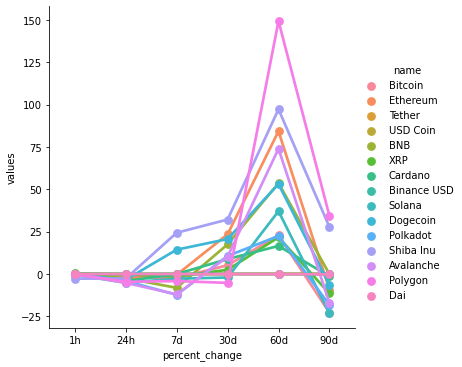

In [18]:
sns.catplot(x='percent_change',y='values',hue='name',data=df8,kind='point')

In [19]:
df9=df[['name','quote.USD.price','timestamp']]
df9=df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,23431.81803,2022-08-17 15:38:33.638456
15,Bitcoin,23431.81803,2022-08-17 15:38:33.638456
30,Bitcoin,23426.28918,2022-08-17 15:39:34.701939
45,Bitcoin,23426.28918,2022-08-17 15:39:34.701939
60,Bitcoin,23423.63128,2022-08-17 15:40:35.805044
75,Bitcoin,23423.63128,2022-08-17 15:40:35.805044
90,Bitcoin,23423.63128,2022-08-17 15:41:39.569974
105,Bitcoin,23423.63128,2022-08-17 15:41:39.569974
120,Bitcoin,23428.73837,2022-08-17 15:42:41.135267
135,Bitcoin,23428.73837,2022-08-17 15:42:41.135267


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

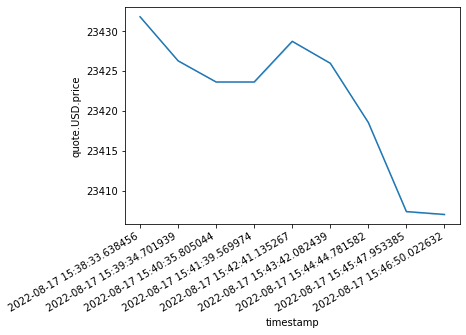

In [20]:
sns.lineplot(x='timestamp',y='quote.USD.price',data=df9)
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',  
)